## Name: Ankit Tripathi
## USC ID: 4612676999
## Github Username: AnkitTripathi45

In [1]:
import pandas as pd 
import numpy as np
import glob
import os
from scipy.stats import bootstrap
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore")
import imblearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

### Question 1.b

In [2]:
dfs_test=[]  
dfs_train=[]   
#For bending1
filepath= r'../data/AReM/bending1'
files=glob.glob(os.path.join(filepath,"*.csv"))

for i in files:
    if (i=="../data/AReM/bending1\dataset1.csv") or (i=="../data/AReM/bending1\dataset2.csv"):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)
        
#for bending2
filepath2= r'../data/AReM/bending2'
files=glob.glob(os.path.join(filepath2,"*.csv"))

for i in files:
    if (i=="../data/AReM/bending2\dataset1.csv") or (i=="../data/AReM/bending2\dataset2.csv"):
       
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    elif (i=="../data/AReM/bending2\dataset4.csv"):
        dfs=pd.read_csv(i,sep=' ',skiprows=5,names=["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"],index_col=False)
        dfs_train.append(dfs)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)
        
#For cycling
file_cycle= r'../data/AReM/cycling'
files=glob.glob(os.path.join(file_cycle,"*.csv"))

for i in files:
    if ((i=="../data/AReM/cycling\dataset1.csv") or (i=="../data/AReM/cycling\dataset2.csv") or(i=="../data/AReM/cycling\dataset3.csv")):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)
        
#For lying dataset
file_lying= r'../data/AReM/lying'
files=glob.glob(os.path.join(file_lying,"*.csv"))
 

for i in files:
    if ((i=="../data/AReM/lying\dataset1.csv") or (i=="../data/AReM/lying\dataset2.csv") or (i=="../data/AReM/lying\dataset3.csv")):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)

#For sitting
file_sitting= r'../data/AReM/sitting'
files=glob.glob(os.path.join(file_sitting,"*.csv"))
 

for i in files:
    if ((i=="../data/AReM/sitting\dataset1.csv") or (i=="../data/AReM/sitting\dataset2.csv") or (i=="../data/AReM/sitting\dataset3.csv")):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)

#For standing
file_standing= r'../data/AReM/standing'
files=glob.glob(os.path.join(file_standing,"*.csv"))
 

for i in files:
    if ((i=="../data/AReM/standing\dataset1.csv") or (i=="../data/AReM/standing\dataset2.csv") or (i=="../data/AReM/standing\dataset3.csv")):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)
        
#For walking 
file_walking= r'../data/AReM/walking'
files=glob.glob(os.path.join(file_walking,"*.csv"))
 

for i in files:
    if ((i=="../data/AReM/walking\dataset1.csv") or (i=="../data/AReM/walking\dataset2.csv") or (i=="../data/AReM/walking\dataset3.csv")):
        
        df=pd.read_csv(i,skiprows=4)
        dfs_test.append(df)
    else:
        df=pd.read_csv(i,skiprows=4)
        dfs_train.append(df)             

dfs_test2=pd.concat(dfs_test,axis=0,ignore_index=True)
dfs_train2=pd.concat(dfs_train,axis=0,ignore_index=True) 


### Question 1.c.(i)

**The time-domain features which are used in time series classification are namely Minimum, maximum, mean, median, standard deviation, first quartile, and third quartile.**

### Question 1.c.(ii)
minimum, maximum, mean, median, standard
deviation, rst quartile, and third quartile

In [3]:
coloums=[]
for k in range(1,7):
    coloums.append(['min'+str(k),'max'+str(k),r'mean'+str(k),r'median'+str(k),r'std'+str(k),r'1st quart'+str(k),r'3rd quart'+str(k)])
fnl_coloumn = [item for sublist in coloums for item in sublist]
    

In [4]:
  
bending1=[]
for k in range(1,8):
    bending1.append("dataset"+str(k))
    
filepath_bend= r'../data/AReM/bending1'
files=glob.glob(os.path.join(filepath_bend,"*.csv"))

df_final= pd.DataFrame(columns=fnl_coloumn)
for i in bending1:
    df=pd.read_csv(filepath_bend+'/' + str(i)+".csv",skiprows=4)
    df.drop(columns=['# Columns: time'],axis=1)
    temp=[]
    for j in df.columns[1:]:
        temp.append(df[j].min())
        temp.append(df[j].max())
        temp.append(df[j].mean())
        temp.append(df[j].median())
        temp.append(df[j].std())
        temp.append(df[j].quantile(0.25))
        temp.append(df[j].quantile(0.75))
        
    df_final.loc[len(df_final)]=temp

In [5]:
bending2=[]
for k in range(1,7):
    bending2.append("dataset"+str(k))


filepath_bend2= r'../data/AReM/bending2'

df_final2= pd.DataFrame(columns=fnl_coloumn)


for i in bending2:
    temp2=[]
    if i == 'dataset4':
        path="../data/AReM/bending2/"+str(i)+".csv"
        df_bend2=pd.read_csv(path,sep=' ',skiprows=5,names=["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"],index_col=False)  
        for j in df_bend2.columns[1:]:
            temp2.append(df_bend2[j].min())
            temp2.append(df_bend2[j].max())
            temp2.append(df_bend2[j].mean())
            temp2.append(df_bend2[j].median())
            temp2.append(df_bend2[j].std())
            temp2.append(df_bend2[j].quantile(0.25))
            temp2.append(df_bend2[j].quantile(0.75))
    else:
        df_bend2=pd.read_csv(filepath_bend2+'/' + str(i)+".csv",skiprows=4)
        for j in df_bend2.columns[1:]:
            temp2.append(df_bend2[j].min())
            temp2.append(df_bend2[j].max())
            temp2.append(df_bend2[j].mean())
            temp2.append(df_bend2[j].median())
            temp2.append(df_bend2[j].std())
            temp2.append(df_bend2[j].quantile(0.25))
            temp2.append(df_bend2[j].quantile(0.75))
    df_final2.loc[len(df_final2)]=temp2

In [6]:
cycling=[]
for k in range(1,16):
    cycling.append("dataset"+str(k))
filepath_cyc= r'../data/AReM/cycling'
files=glob.glob(os.path.join(filepath_cyc,"*.csv"))


df_final_cyc= pd.DataFrame(columns=fnl_coloumn)
for i in cycling:
    df_cyc=pd.read_csv(filepath_cyc+'/' + str(i)+".csv",skiprows=4)
    temp_cyc=[]
    for j in df_cyc.columns[1:]:
        temp_cyc.append(df_cyc[j].min())
        temp_cyc.append(df_cyc[j].max())
        temp_cyc.append(df_cyc[j].mean())
        temp_cyc.append(df_cyc[j].median())
        temp_cyc.append(df_cyc[j].std())
        temp_cyc.append(df_cyc[j].quantile(0.25))
        temp_cyc.append(df_cyc[j].quantile(0.75))
        
    df_final_cyc.loc[len(df_final_cyc)]=temp_cyc

In [7]:
lying=[]
for k in range(1,16):
    lying.append("dataset"+str(k))

filepath_ly= r'../data/AReM/lying'
files=glob.glob(os.path.join(filepath_ly,"*.csv"))

df_final_ly= pd.DataFrame(columns=fnl_coloumn)
for i in cycling:
    df_ly=pd.read_csv(filepath_ly+'/' + str(i)+".csv",skiprows=4)
    temp_ly=[]
    for j in df_cyc.columns[1:]:
        temp_ly.append(df_ly[j].min())
        temp_ly.append(df_ly[j].max())
        temp_ly.append(df_ly[j].mean())
        temp_ly.append(df_ly[j].median())
        temp_ly.append(df_ly[j].std())
        temp_ly.append(df_ly[j].quantile(0.25))
        temp_ly.append(df_ly[j].quantile(0.75))
        
    df_final_ly.loc[len(df_final_ly)]=temp_ly

In [8]:
sitting=[]
for k in range(1,16):
    sitting.append("dataset"+str(k))

filepath_sit= r'../data/AReM/sitting'
files=glob.glob(os.path.join(filepath_sit,"*.csv"))


df_final_sit= pd.DataFrame(columns=fnl_coloumn)
for i in sitting:
    df_sit=pd.read_csv(filepath_sit+'/' + str(i)+".csv",skiprows=4)
    temp_sit=[]
    for j in df_sit.columns[1:]:
        temp_sit.append(df_sit[j].min())
        temp_sit.append(df_sit[j].max())
        temp_sit.append(df_sit[j].mean())
        temp_sit.append(df_sit[j].median())
        temp_sit.append(df_sit[j].std())
        temp_sit.append(df_sit[j].quantile(0.25))
        temp_sit.append(df_sit[j].quantile(0.75))
        
    df_final_sit.loc[len(df_final_sit)]=temp_sit

In [9]:
standing=[]
for k in range(1,16):
    standing.append("dataset"+str(k))

filepath_stan= r'../data/AReM/standing'
files=glob.glob(os.path.join(filepath_stan,"*.csv"))

df_final_stan= pd.DataFrame(columns=fnl_coloumn)
for i in standing:
    df_stan=pd.read_csv(filepath_stan+'/' + str(i)+".csv",skiprows=4)
    temp_stan=[]
    for j in df_stan.columns[1:]:
        temp_stan.append(df_stan[j].min())
        temp_stan.append(df_stan[j].max())
        temp_stan.append(df_stan[j].mean())
        temp_stan.append(df_stan[j].median())
        temp_stan.append(df_stan[j].std())
        temp_stan.append(df_stan[j].quantile(0.25))
        temp_stan.append(df_stan[j].quantile(0.75))
        
    df_final_stan.loc[len(df_final_stan)]=temp_stan

In [10]:
walking=[]
for k in range(1,16):
    walking.append("dataset"+str(k))

filepath_walk= r'../data/AReM/walking'
files=glob.glob(os.path.join(filepath_walk,"*.csv"))


df_final_walk= pd.DataFrame(columns=fnl_coloumn)
for i in walking:
    df_walk=pd.read_csv(filepath_walk+'/' + str(i)+".csv",skiprows=4)
    temp_walk=[]
    for j in df_walk.columns[1:]:
        temp_walk.append(df_walk[j].min())
        temp_walk.append(df_walk[j].max())
        temp_walk.append(df_walk[j].mean())
        temp_walk.append(df_walk[j].median())
        temp_walk.append(df_walk[j].std())
        temp_walk.append(df_walk[j].quantile(0.25))
        temp_walk.append(df_walk[j].quantile(0.75))
        
    df_final_walk.loc[len(df_final_walk)]=temp_walk

In [11]:
frames=[df_final,df_final2,df_final_cyc,df_final_ly,df_final_sit,df_final_stan,df_final_walk]
fnl_df= pd.concat(frames,ignore_index=True)
fnl_df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


### Question 1.c.(iii)

Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python's bootstrapped or any other
method to build a 90% bootsrap condence interval for the standard deviation
of each feature.

In [12]:
fnl_df.describe()

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.0,88.000000,88.000000,...,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,29.036705,45.473068,38.917357,38.856705,2.988893,37.01983,41.197216,0.0,6.290114,1.459119,...,3.537752,13.826761,18.52821,0.004886,6.461932,1.620686,1.445511,1.048533,0.902017,2.142614
std,9.569975,4.394362,5.335718,5.440054,1.772153,6.15359,5.138925,0.0,5.062729,1.574164,...,1.024898,6.096465,5.53172,0.045838,2.518921,1.154812,1.086474,0.517617,0.758584,1.523599
min,0.000000,30.000000,24.562958,24.250000,0.032038,23.18750,26.500000,0.0,0.430000,0.007167,...,1.745970,1.000000,5.54250,0.000000,1.790000,0.383292,0.430000,0.388372,0.000000,0.500000
25%,21.875000,44.585000,34.845755,35.447500,1.468289,31.62750,38.250000,0.0,1.767500,0.366630,...,2.942275,11.295000,16.64250,0.000000,4.500000,0.730656,0.500000,0.613688,0.430000,1.000000
50%,28.625000,45.750000,39.433792,39.415000,3.212700,39.20000,40.250000,0.0,4.500000,0.489365,...,3.265060,14.000000,18.28125,0.000000,6.310000,0.930188,0.830000,0.838716,0.470000,1.220000
75%,36.270000,47.750000,43.013250,43.250000,4.552490,42.00000,45.000000,0.0,10.930000,2.731505,...,4.074511,15.500000,20.75000,0.000000,8.765000,3.005229,2.615000,1.642064,1.670000,4.043125
max,48.000000,56.250000,48.004167,48.000000,7.684146,48.00000,54.000000,0.0,17.240000,4.576562,...,7.853427,35.362500,36.50000,0.430000,13.610000,3.530500,3.340000,1.963685,2.240000,4.617500


In [13]:
conf_interval=pd.DataFrame(columns=["The features","90% confidence interval"])
conf_intrvl=[]
conf_interval["The features"] =fnl_coloumn 
for i in range (0,len(fnl_df.columns)):
  # samples must be in a sequence
    res = bootstrap((fnl_df.iloc[:,i],), np.std, confidence_level=0.9,random_state=20, method='percentile')
    conf_intrvl.append(res.confidence_interval)
# print(conf_intrvl)
conf_interval["90% confidence interval"]=pd.Series(conf_intrvl)
conf_interval

,The features,90% confidence interval
0,min1,"(8.220271812862707, 10.747142221480257)"
1,max1,"(3.3020854247746216, 5.270227562748143)"
2,mean1,"(4.677505279146085, 5.864745831892031)"
3,median1,"(4.761192369125907, 5.964650126105345)"
4,std1,"(1.5629222078435208, 1.9375555695142643)"
5,1st quart1,"(5.5449812421193245, 6.604263735725837)"
6,3rd quart1,"(4.306865597067371, 5.821317331332637)"
7,min2,"(0.0, 0.0)"
8,max2,"(4.605728089602471, 5.3749804527194955)"
9,mean2,"(1.393513574368541, 1.695964653902786)"


### Question i.c.(iv)
Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).

**According to me the most important features are namely Standard Deviation, median, and mean.
the most important features to seem like mean, median and standard deviation.**

**1) Standard Deviaiton because a) its a key features in determining the expansion of the curve and  how it's shaped along the values of features. b) In our dataset, the range of confidence interval is the lowest for standard deviation and hence its an important features.**

**2) Median because a) its range of confidence interval is also among the smallest b) median gives how skewed the distribution is,and represents the half of dataset and therefore gives a better perspective of the data. .**

**3) Mean because a)it  gives the information about the position of peak of the distribution and the type of distribution b) In our dataset its range for confidence interval is among the smallest ones.**



### Question 2.a.(i)

Binary Classification Using Logistic Regression3

i. Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classication problem. Depict scatter plots
of the features you specied in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).4


In [14]:
fnl_test1=fnl_df.iloc[0:2]
fnl_train1=fnl_df.iloc[2:7]

fnl_test2=fnl_df.iloc[7:9]
fnl_train2=fnl_df.iloc[9:13]

fnl_test3=fnl_df.iloc[13:16]
fnl_train3=fnl_df.iloc[16:28]

fnl_test4=fnl_df.iloc[28:31]
fnl_train4=fnl_df.iloc[31:43]

fnl_test5=fnl_df.iloc[43:46]
fnl_train5=fnl_df.iloc[46:58]

fnl_test6=fnl_df.iloc[58:61]
fnl_train6=fnl_df.iloc[61:73]

fnl_test7=fnl_df.iloc[73:76]
fnl_train7=fnl_df.iloc[76:89]


fnl_tra=[fnl_train1,fnl_train2,fnl_train3,fnl_train4,fnl_train5,fnl_train6,fnl_train7]
fnl_tes=[fnl_test1,fnl_test2,fnl_test3,fnl_test4,fnl_test5,fnl_test6,fnl_test7]

fnl_train=pd.concat(fnl_tra)
fnl_test=pd.concat(fnl_tes)

In [15]:
fnl_selected_df=fnl_train[['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6']]
labelfff= list([1]*9 + [0]*60)

fnl_selected_df['labels']=labelfff
fnl_selected_df.reset_index(drop=True,inplace=True)

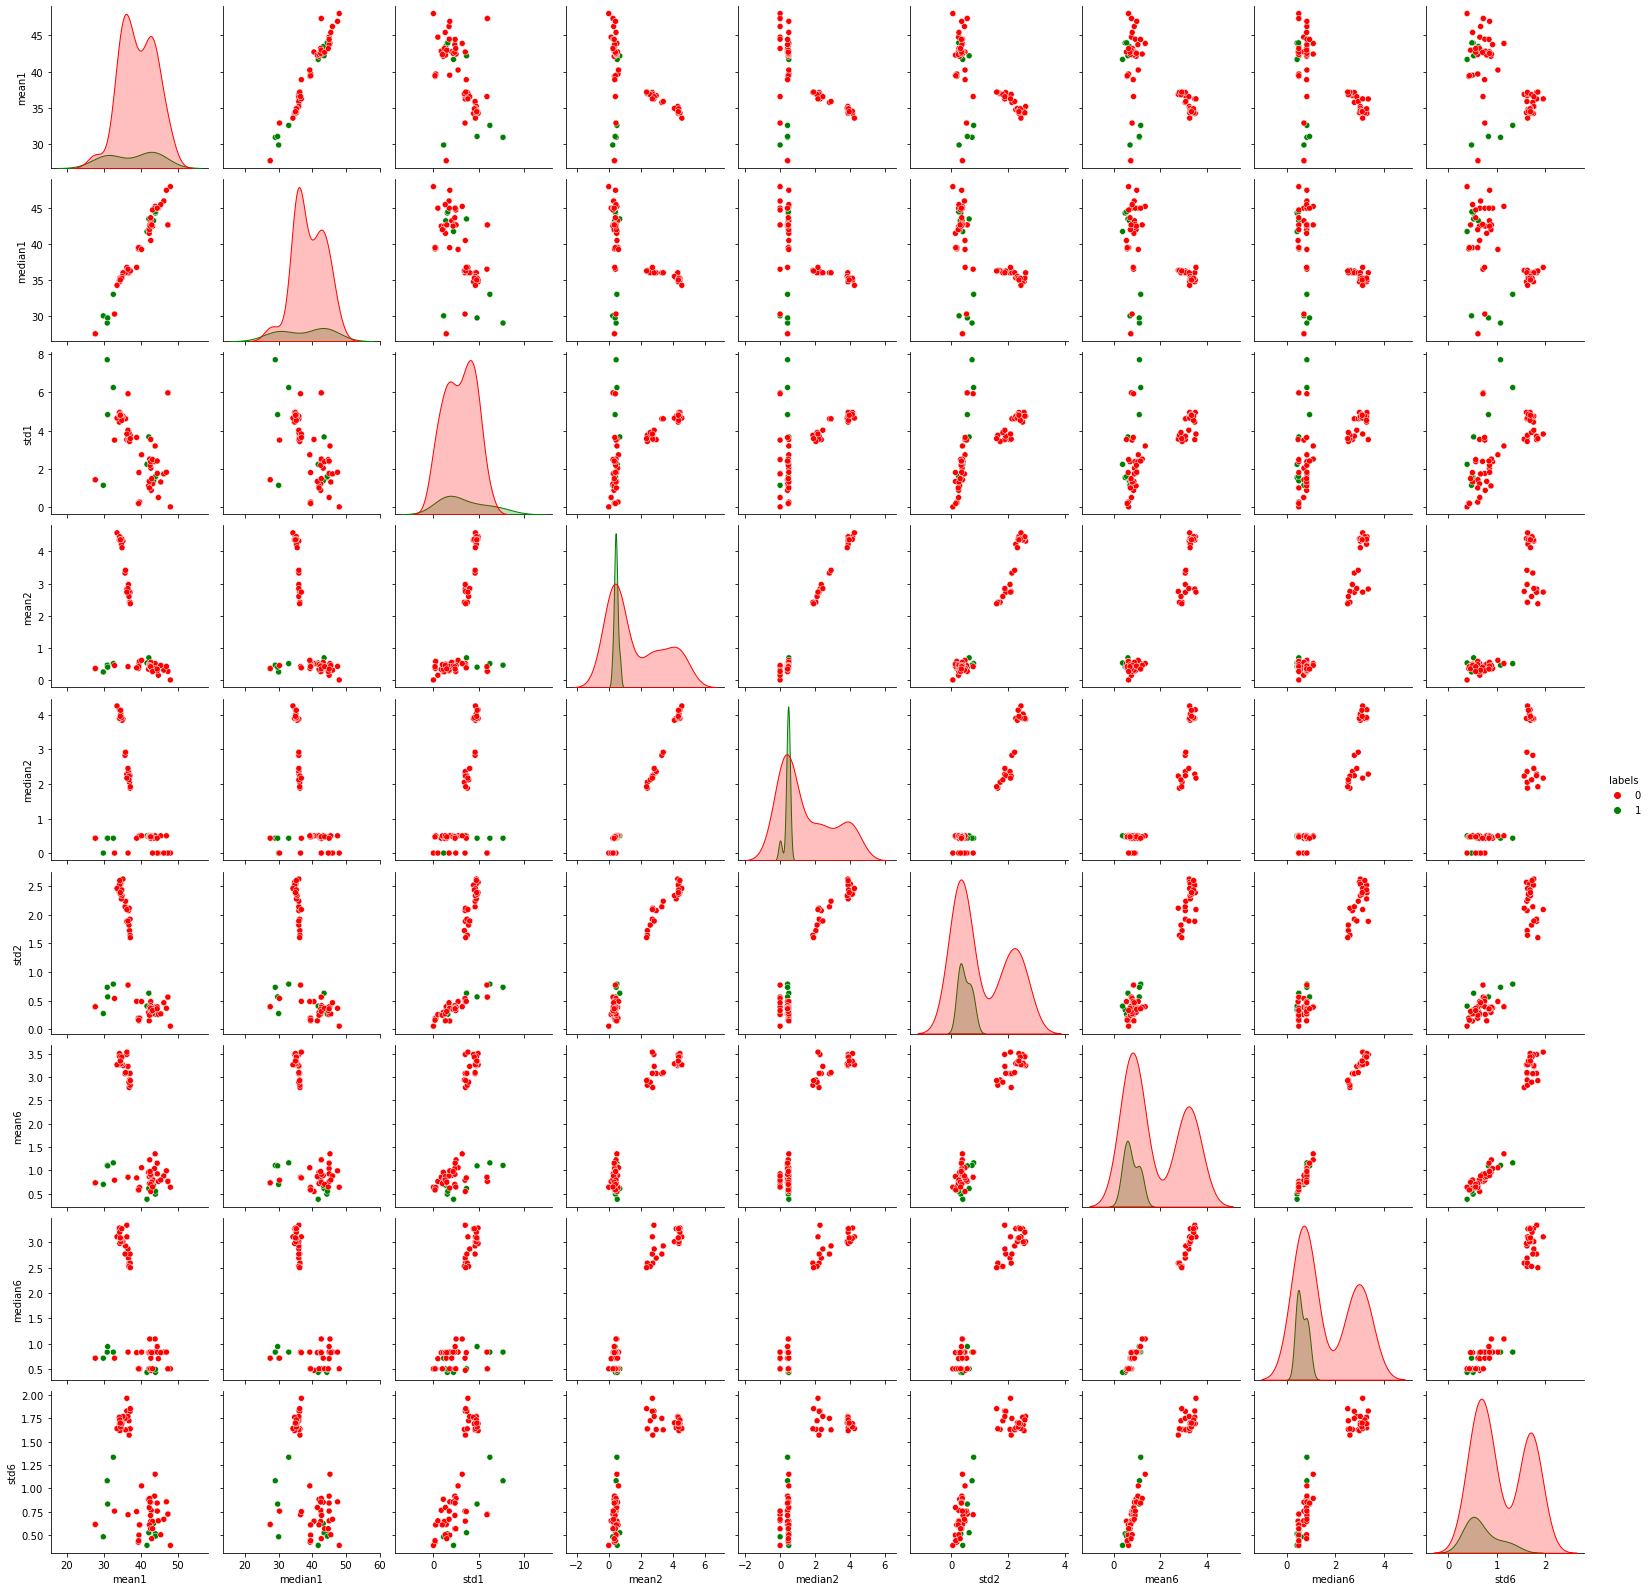

In [16]:
sns.pairplot(fnl_selected_df, hue ='labels',palette=['r','g'])

### Question 2.a.(ii)

Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable dierence in
the results with those of 2(a)i?

In [17]:
def main_df(p):
    fnl_col = []
    stat = ['Mean','Median','std']

    for i in [1,2,6]:
        for j in stat:
            for k in range(1,p+1):
                fnl_col.append(j+str(i)+str(k))
    df_fnl= pd.DataFrame(columns=fnl_col)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl=[]
    for v in dfs_train:
        for j in [1,2,6]:
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl.append(l1)
            l1=[]
            lst_fnl.append(l2)
            l2=[]
            lst_fnl.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl:
        flat+=i
    j=0
    for i in fnl_col:
        df_fnl[i] = flat[j:len(flat)+1:9*p]
        j+=1
    labelss= list([1]*9 + [0]*60)
    df_fnl['labels']=labelss
    return df_fnl

df_final=main_df(2)


labelss= list([1]*9 + [0]*60)
df_final['labels']=labelss
df_final

,Mean11,Mean12,Median11,Median12,std11,std12,Mean21,Mean22,Median21,Median22,std21,std22,Mean61,Mean62,Median61,Median62,std61,std62,labels
0,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,0.329540,0.342346,0.598250,0.388333,0.500,0.000,0.526656,0.478528,1
1,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,0.634285,0.627915,0.640958,0.586083,0.765,0.470,0.554542,0.491873,1
2,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,0.489595,0.273050,0.419083,0.347500,0.430,0.430,0.411200,0.363144,1
3,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,0.314099,0.260761,0.815417,0.543875,0.710,0.500,0.718016,0.473445,1
4,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,0.284434,0.235493,0.524875,0.585750,0.470,0.500,0.486847,0.487918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.966250,34.560417,35.500,35.000,4.733014,4.752584,4.207958,4.239625,3.900,3.960,2.331940,2.227526,3.146333,3.430208,3.035,3.350,1.638218,1.647979,0
65,34.737042,35.134583,35.500,35.585,4.276717,4.989014,4.217333,4.014167,4.030,3.670,2.337759,2.333172,3.334125,3.225917,3.000,3.085,1.737573,1.665326,0
66,33.886458,34.779625,34.375,35.000,5.143776,4.714249,4.332208,4.461708,3.900,3.935,2.453111,2.682846,3.248417,3.274750,3.015,2.955,1.565557,1.670593,0
67,34.836458,34.363292,35.750,35.000,4.869092,4.588342,4.257750,4.539917,3.770,4.075,2.512633,2.561608,3.169625,3.409458,2.870,3.110,1.647640,1.707089,0


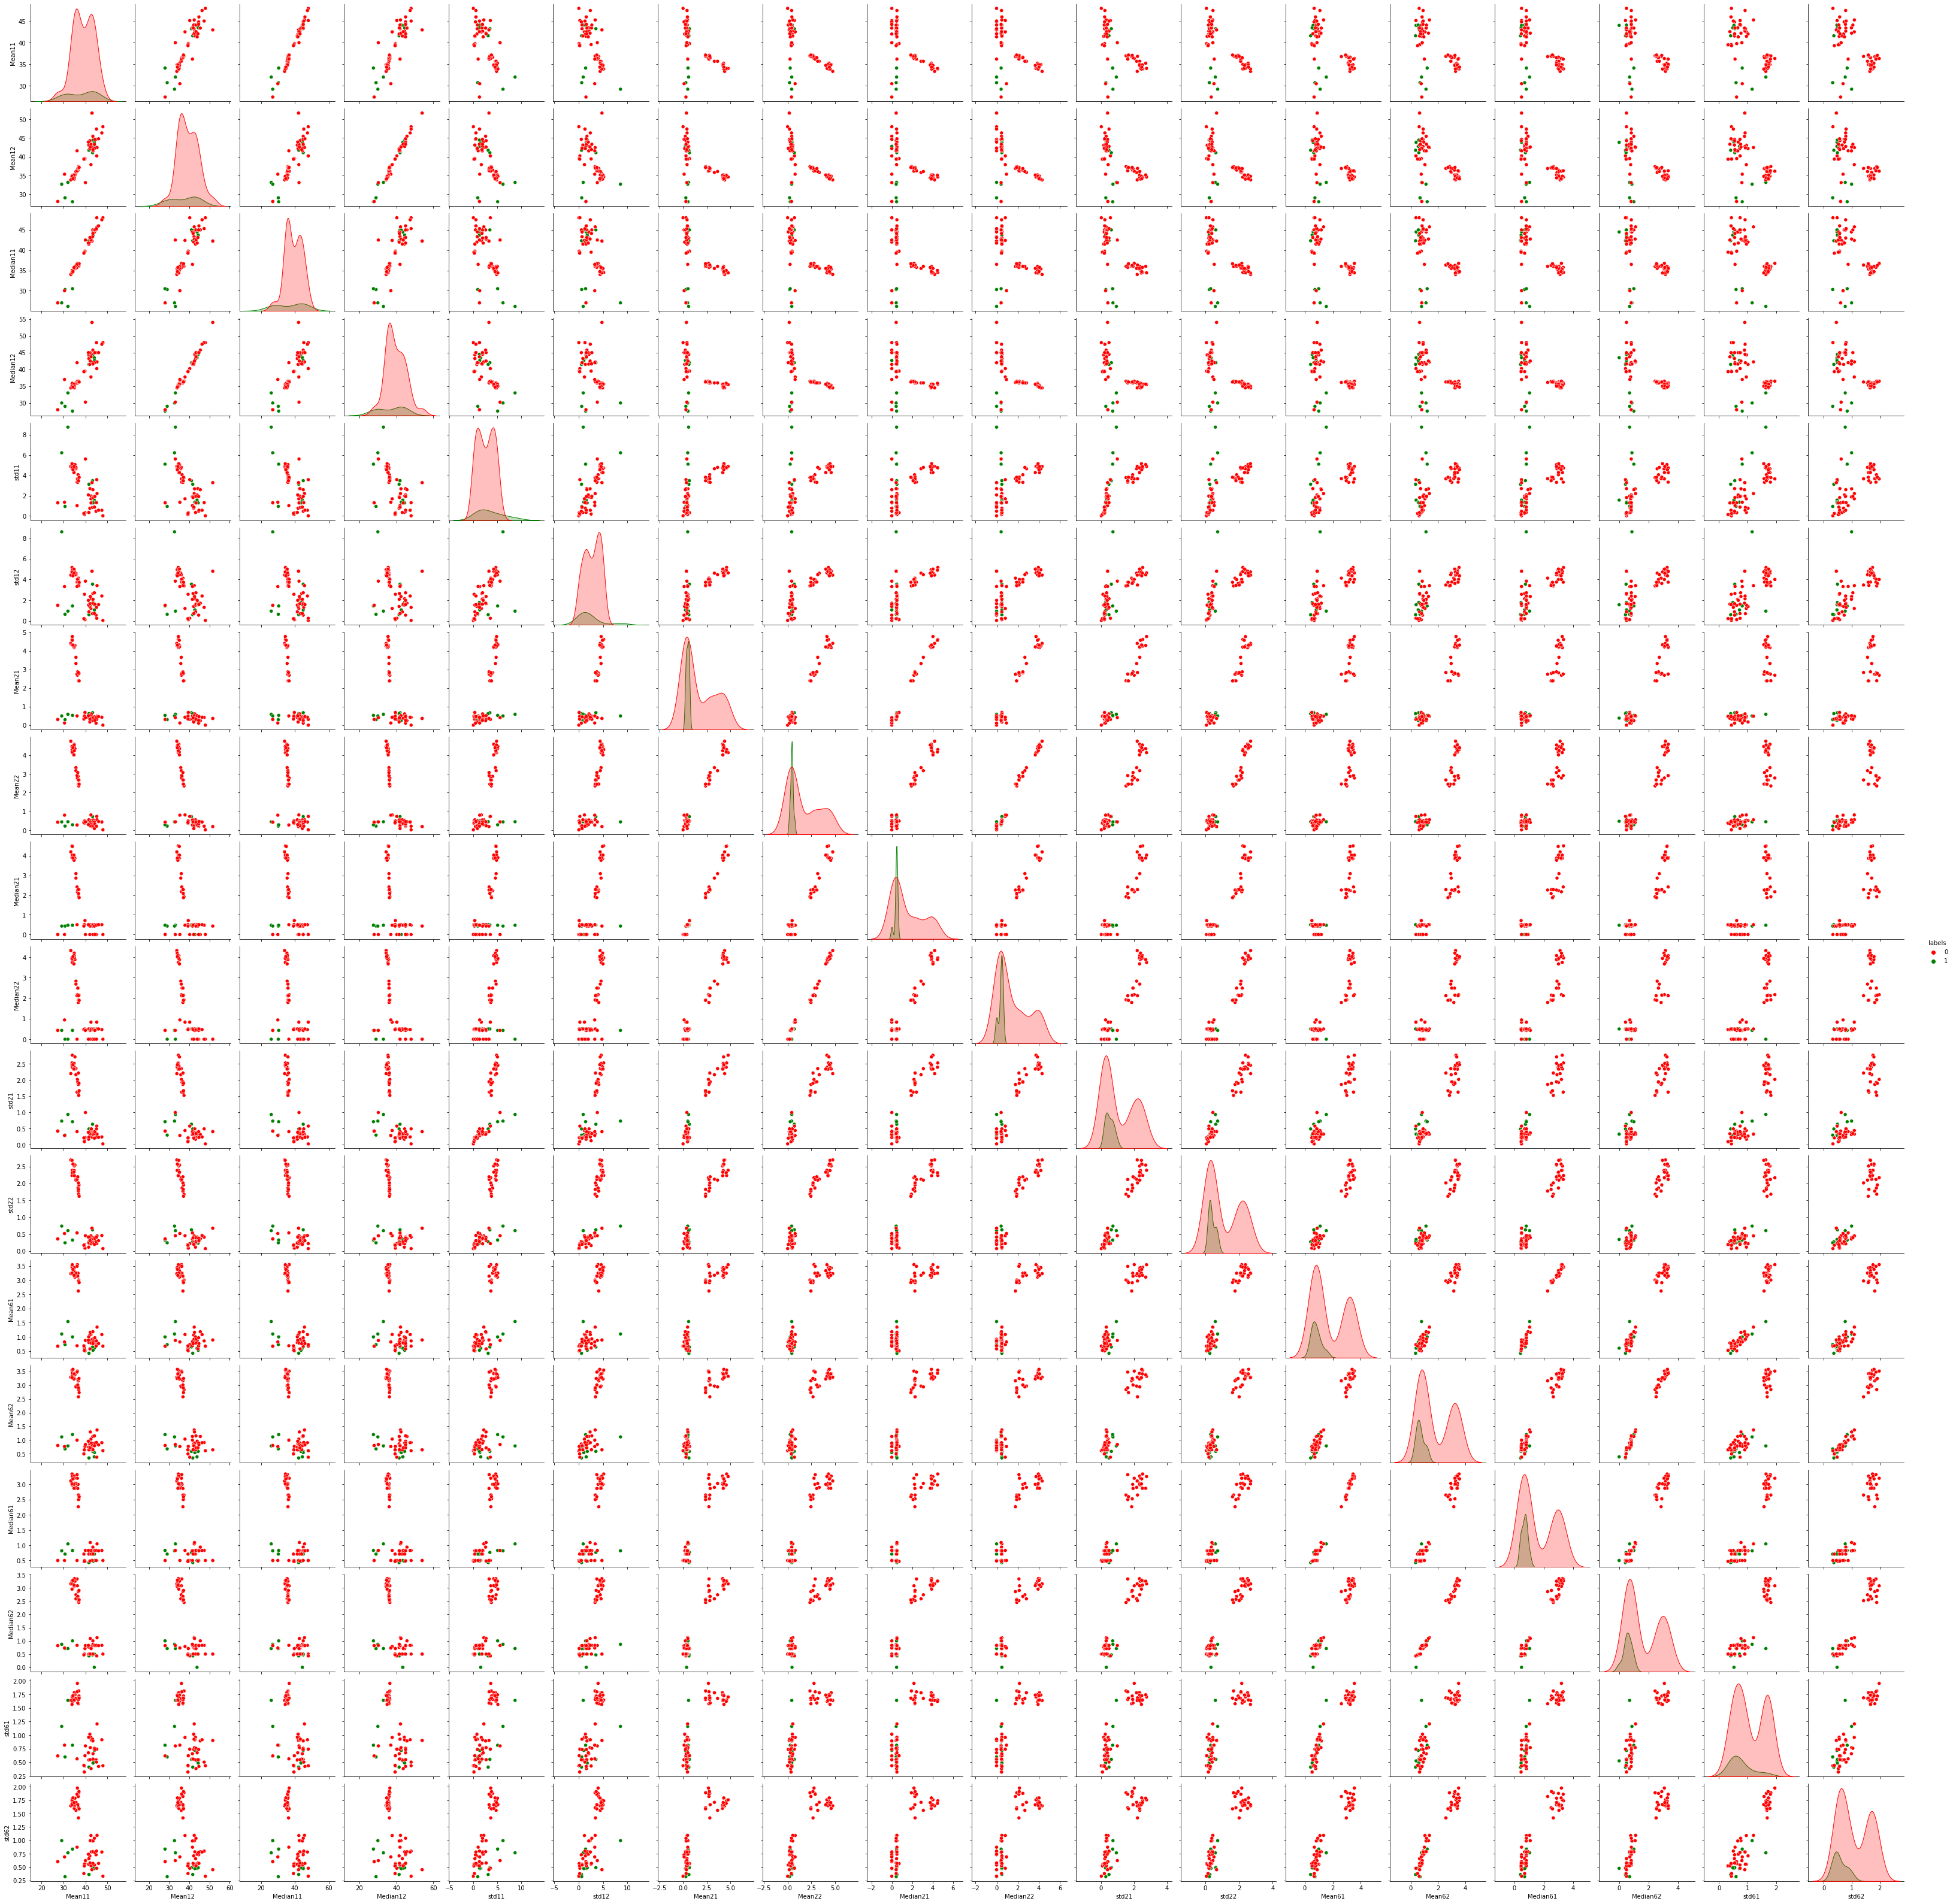

In [18]:
sns.pairplot(df_final,hue="labels",palette=['r','g'])

**Dividing the time series provides extra features to the dataset. The pairplot shows little difference, although it may increase model performance.**

### Question 2.a.iii

Break each time series in your training set into l 2 f1; 2; : : : ; 20g time series
of approximately equal length and use logistic regression5 to solve the binary
classication problem, using time-domain features. 
Remember that breaking each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of l and ret a logistic regression model using your pruned set of features.6
Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l; p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation
in this problem.7 Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use stratied cross
validation. Research what it means and use it if needed.

In [19]:
def main_df2(p):
    fnl_col = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col.append(j+str(i)+str(k))
    
    df_fnl= pd.DataFrame(columns=fnl_col)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl=[]
    for v in dfs_train:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl.append(l1)
            l1=[]
            lst_fnl.append(l2)
            l2=[]
            lst_fnl.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl:
        flat+=i
    j=0
    for i in fnl_col:
        df_fnl[i] = flat[j:len(flat)+1:18*p]
        j+=1
    labelss= list([1]*9 + [0]*60)
    df_fnl['labels']=labelss
    return df_fnl
main_df2(2)

,Mean11,Mean12,Median11,Median12,std11,std12,Mean21,Mean22,Median21,Median22,...,Median52,std51,std52,Mean61,Mean62,Median61,Median62,std61,std62,labels
0,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,...,36.000,1.315724,2.298693,0.598250,0.388333,0.500,0.000,0.526656,0.478528,1
1,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,...,30.415,1.650105,3.760118,0.640958,0.586083,0.765,0.470,0.554542,0.491873,1
2,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,...,29.750,2.701406,2.062647,0.419083,0.347500,0.430,0.430,0.411200,0.363144,1
3,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,...,23.250,2.967487,1.881721,0.815417,0.543875,0.710,0.500,0.718016,0.473445,1
4,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,...,21.750,4.271610,1.929494,0.524875,0.585750,0.470,0.500,0.486847,0.487918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.966250,34.560417,35.500,35.000,4.733014,4.752584,4.207958,4.239625,3.900,3.960,...,16.000,3.017264,3.325780,3.146333,3.430208,3.035,3.350,1.638218,1.647979,0
65,34.737042,35.134583,35.500,35.585,4.276717,4.989014,4.217333,4.014167,4.030,3.670,...,16.250,3.231729,3.148561,3.334125,3.225917,3.000,3.085,1.737573,1.665326,0
66,33.886458,34.779625,34.375,35.000,5.143776,4.714249,4.332208,4.461708,3.900,3.935,...,15.875,2.560395,3.389030,3.248417,3.274750,3.015,2.955,1.565557,1.670593,0
67,34.836458,34.363292,35.750,35.000,4.869092,4.588342,4.257750,4.539917,3.770,4.075,...,16.000,2.933582,2.882455,3.169625,3.409458,2.870,3.110,1.647640,1.707089,0


In [20]:
lst_mean=[]
lst_features=[]

# estimator=LogisticRegression(random_state=0, solver='liblinear')
# selector=RFECV(estimator,cv=StratifiedKFold(5))
p=[p for p in range(1,21)]

for val in p:
    estimator=LogisticRegression()
    selector=RFECV(estimator,min_features_to_select=3,cv=StratifiedKFold(n_splits=5))
    z=main_df2(val)
    x=z.iloc[:,:-1]
    y=z['labels']
    selector.fit(x,y)
    lst_mean.append(np.mean(selector.cv_results_['mean_test_score']))
    mask=selector.support_
    lst_features.append(selector.get_feature_names_out(x.columns))
    print(val,x.shape)
print(lst_mean)

1 (69, 18)
2 (69, 36)
3 (69, 54)
4 (69, 72)
5 (69, 90)
6 (69, 108)
7 (69, 126)
8 (69, 144)
9 (69, 162)
10 (69, 180)
11 (69, 198)
12 (69, 216)
13 (69, 234)
14 (69, 252)
15 (69, 270)
16 (69, 288)
17 (69, 306)
18 (69, 324)
19 (69, 342)
20 (69, 360)
[0.9399725274725275, 0.913639301874596, 0.9373837700760779, 0.9352276295133439, 0.9378621378621379, 0.9316400580551524, 0.9316288550159518, 0.9367357994118558, 0.9390178571428572, 0.9474070872947279, 0.9479367571204307, 0.9485211050631612, 0.9434681697612733, 0.94469010989011, 0.946047236345744, 0.9491969568892648, 0.9478347310584152, 0.950402702887175, 0.9427407886231417, 0.9543710479464671]


In [21]:
l=np.argmax(lst_mean)+1
feature_sub=lst_features[l-1]
p=len(feature_sub)
feature_sub
l

20

In [22]:
print("Best l,p pair:",l,p)

Best l,p pair: 20 4


In [23]:
lp_df=main_df2(l)
lp_df

,Mean11,Mean12,Mean13,Mean14,Mean15,Mean16,Mean17,Mean18,Mean19,Mean110,...,std612,std613,std614,std615,std616,std617,std618,std619,std620,labels
0,43.513750,44.537917,44.572917,42.885000,42.638750,44.878333,44.114583,44.607083,44.253750,44.569583,...,0.537166,0.308323,0.413185,0.418870,0.486420,0.225340,0.177588,0.174600,0.338586,1
1,44.097083,44.343750,44.162917,43.527500,43.843750,42.909583,42.267083,42.524167,41.651250,43.461667,...,0.456038,0.425190,0.404149,0.546975,0.571492,0.489136,0.383133,0.551109,0.387545,1
2,41.563750,41.777083,42.112083,39.187083,39.910000,40.084583,41.513750,43.831667,43.677083,42.555000,...,0.611249,0.333710,0.264838,0.239918,0.251367,0.266197,0.244724,0.242378,0.319514,1
3,44.756667,44.958333,45.031250,45.000000,44.916667,44.315833,44.194583,43.232500,42.250000,42.514583,...,0.248810,0.196125,0.253016,0.362334,0.281146,0.359359,0.307581,0.328885,0.954108,1
4,42.951250,43.116250,42.394583,42.465417,43.066250,43.732500,43.954583,44.722500,44.652917,43.805833,...,0.378393,0.246933,0.262065,0.378147,0.699645,0.536040,0.418801,0.283939,0.473721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.902917,36.889167,34.167083,36.625000,34.425417,34.926667,34.003333,34.055417,35.042083,34.625417,...,1.769859,1.518590,1.693542,2.261864,1.324460,1.743644,1.447813,1.501645,1.689497,0
65,34.423750,34.373333,33.411667,34.652917,34.170000,34.951250,34.412083,35.604583,35.220833,36.150000,...,1.872776,1.671424,1.784300,1.231618,1.852991,2.068277,1.631700,1.407260,1.561266,0
66,34.336250,33.215000,32.944167,35.072917,32.708333,33.253750,33.625000,34.970000,34.079583,34.659583,...,1.789374,1.724829,1.246246,1.387055,1.647285,1.964479,1.684944,1.479904,2.026151,0
67,36.288333,36.319583,35.173750,34.020833,36.420417,34.125000,35.204167,34.572917,33.218750,33.020833,...,1.758418,1.567058,1.669874,1.692393,1.897692,1.862079,1.202688,1.497868,1.776087,0


In [24]:
lp_df_fnl=lp_df[feature_sub]
label_lp= list([1]*9 + [0]*60)
lp_df_fnl['labels']=label_lp
lp_df_fnl

,Median37,Mean53,Mean518,Median53,labels
0,24.000,36.382083,35.979167,36.500,1
1,24.000,37.715417,27.961667,37.875,1
2,18.415,28.854167,28.941250,29.875,1
3,18.670,23.205000,23.621667,23.710,1
4,15.250,29.968750,19.309167,30.000,1
...,...,...,...,...,...
64,14.500,15.657500,16.712083,15.875,0
65,15.750,16.382083,16.001667,16.250,0
66,15.000,16.350833,14.903333,16.750,0
67,15.875,16.069583,15.381667,16.000,0


In [25]:
feature_sub

array(['Median37', 'Mean53', 'Mean518', 'Median53'], dtype=object)

**The incorrect method of performing cross validation is to first pick the best features subset that shows pretty good association and then use that subset to build a classifier.**

**Cross validation is done correctly by first splitting the data into k-folds and then determining the best features using all of the samples except the one that is missing. Then, using all of the samples, constructing a classifier and then testing it on the ones that were left out.**

In [26]:
import statsmodels.api as sms
X_train=lp_df_fnl.iloc[:,:-1]
Y_train=lp_df_fnl.iloc[:,-1:]
log_reg = sms.Logit(Y_train, X_train).fit(method="lbfgs")
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3872
Time:                        03:16:20   Log-Likelihood:                -16.373
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 0.0001222
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median37      -0.5945      0.190     -3.136      0.002      -0.966      -0.223
Mean53         2.6644      1.333      1.999      0.046       0.052       5.277
Mean518       -0.3744      0.155     -2.416      0.0

### Question 2.a.(iv)

Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression Bi's as well
as the p-values associated with them


[[60  0]
 [ 0  9]]


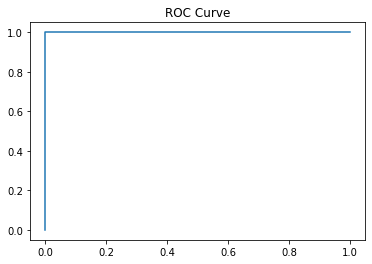

AUC: 1.0


In [27]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

pred=logisticRegr.predict(X_train)

print(confusion_matrix(Y_train,pred))
fpr,tpr,thresholds=metrics.roc_curve(Y_train, pred)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

### Question 2.a.(v)

v. Test the classier on the test set. Remember to break the time series in
your test set into the same number of time series into which you broke your
training set. Remember that the classier has to be tested using the features
extracted from the test set. Compare the accuracy on the test set with the
cross-validation accuracy you obtained previously.

In [28]:
def main_test2(p):
    fnl_col_test = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_test.append(j+str(i)+str(k))
    
    df_fnl_test= pd.DataFrame(columns=fnl_col_test)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_test=[]
    for v in dfs_test:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_test.append(l1)
            l1=[]
            lst_fnl_test.append(l2)
            l2=[]
            lst_fnl_test.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_test:
        flat+=i
    j=0
    for i in fnl_col_test:
        df_fnl_test[i] = flat[j:len(flat)+1:18*p]
        j+=1
    labelss= list([1]*4 + [0]*15)
    df_fnl_test['labels']=labelss
    return df_fnl_test


In [29]:
tst= main_test2(l)
tst

,Mean11,Mean12,Mean13,Mean14,Mean15,Mean16,Mean17,Mean18,Mean19,Mean110,...,std612,std613,std614,std615,std616,std617,std618,std619,std620,labels
0,39.673750,41.128750,41.697917,41.913333,42.013750,42.000000,40.142500,40.392500,40.517500,39.989583,...,0.540499,0.408592,0.386005,0.558016,0.609340,0.482331,0.337098,0.518891,0.304634,1
1,43.437917,43.412917,43.412500,43.080000,42.406250,42.204583,42.211667,42.086667,42.107500,42.072917,...,0.671880,0.556869,0.759863,0.463071,0.249277,0.356809,0.479373,0.420168,0.364220,1
2,19.420000,21.854167,22.656250,24.392083,21.461667,24.438333,25.472500,29.305417,32.207917,25.545417,...,0.715854,0.647924,0.999265,0.286197,0.432494,1.212541,0.414980,0.298120,0.293671,1
3,26.989583,28.603750,29.947917,29.510417,28.232500,28.960000,29.708333,29.416667,29.138750,30.207917,...,0.874740,0.614633,0.629457,1.472134,1.267470,1.204228,1.246787,1.886749,1.150705,1
4,36.107500,37.395833,36.667083,37.149583,37.297500,37.490000,35.110833,37.180417,36.885417,38.257917,...,1.620478,2.201568,2.082573,1.736581,2.428644,1.546429,1.922445,2.013275,1.651232,0
5,37.256667,37.257083,37.688333,37.782917,37.306250,37.048750,38.138750,38.103750,37.360417,37.979583,...,2.803894,1.596968,1.664107,1.689963,1.745583,1.866340,1.866337,1.305800,1.840786,0
6,37.910000,37.427083,37.937083,38.593750,37.489583,38.741667,38.145417,37.536667,36.614167,37.011250,...,2.027086,1.610347,1.887813,2.038213,1.803067,1.761954,1.571811,2.235178,1.809187,0
7,28.947917,29.010417,28.410000,26.708333,27.000000,27.072917,27.444583,25.774167,26.756667,26.559167,...,0.446459,0.651343,0.618813,0.674098,0.563735,0.562076,0.624266,0.669431,0.427215,0
8,29.069167,28.912917,29.382083,30.246250,45.989583,48.010417,48.000000,48.000000,48.000000,48.000000,...,0.503054,0.380291,0.452417,0.310263,0.375931,0.380246,0.418319,0.407674,0.340421,0
9,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.010417,...,0.322616,0.315151,0.287689,0.262543,0.280540,0.386127,0.270972,0.198098,0.337542,0


In [30]:
lp_df_test=tst[feature_sub]
label_lp_test= list([1]*4 + [0]*15)
lp_df_test['labels']=label_lp_test
lp_df_test

,Median37,Mean53,Mean518,Median53,labels
0,24.000,33.125000,29.885417,33.000,1
1,21.000,32.888750,33.365000,33.000,1
2,19.000,25.687500,20.906250,27.000,1
3,18.000,15.317500,15.576250,15.415,1
4,19.000,18.673750,20.069583,19.500,0
5,16.875,17.345000,20.393750,17.330,0
6,15.875,19.729167,14.773333,19.750,0
7,2.835,10.593750,13.743333,11.375,0
8,7.000,7.308750,2.488333,7.000,0
9,6.375,3.857500,11.297500,4.000,0


In [31]:
import statsmodels.api as sms
X_train_tst=lp_df_test.iloc[:,:-1]
Y_train_tst=lp_df_test.iloc[:,-1:]
log_reg_tst = sms.Logit(Y_train_tst, X_train_tst).fit(method="lbfgs")
print(log_reg_tst.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                   19
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                -0.04233
Time:                        03:16:21   Log-Likelihood:                -10.192
converged:                       True   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median37      -0.2836      0.176     -1.616      0.106      -0.628       0.060
Mean53         0.0860      0.768      0.112      0.911      -1.419       1.591
Mean518       -0.0149      0.137     -0.109      0.9

[[15  0]
 [ 1  3]]


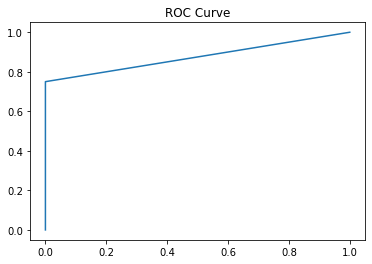

AUC: 0.875


In [32]:
from sklearn import metrics
logisticRegr_tst = LogisticRegression()
logisticRegr_tst.fit(X_train_tst, Y_train_tst)

pred_tst=logisticRegr_tst.predict(X_train_tst)

print(confusion_matrix(Y_train_tst,pred_tst))
fpr,tpr,thresholds=metrics.roc_curve(Y_train_tst, pred_tst)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

In [33]:
acc= metrics.accuracy_score(Y_train_tst,pred_tst)
acc

0.9473684210526315

### Question 2.a.(vi)
Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

**Yes,  Yes there is complete separation between the variables. Also the p values for each variable is high  and the summary shows that the maximal likelihood cannot be computed for this model and that there is a complete seperation between classes.**

**From the pairplot and scatterplot, the classes seem to be well-separated.**

### Question 2.a.(vii)

From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.

**Yes, based on the confusion matrices, imbalanced classes were observed. For case-control sampling, SMOTE() is used.**

In [34]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smo.fit_resample(X_train,Y_train)
Y_train_sm.value_counts()

log_reg_sm = sms.Logit(Y_train_sm, X_train_sm).fit(method='lbfgs')
lr_pred_sm=log_reg_sm.predict(X_train_sm)
print(log_reg_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                  120
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.6140
Time:                        03:16:21   Log-Likelihood:                -32.109
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 5.396e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median37      -0.6069      0.124     -4.887      0.000      -0.850      -0.364
Mean53         1.7334      0.983      1.763      0.078      -0.193       3.660
Mean518       -0.3443      0.119     -2.903      0.0

[[60  0]
 [ 0 60]]


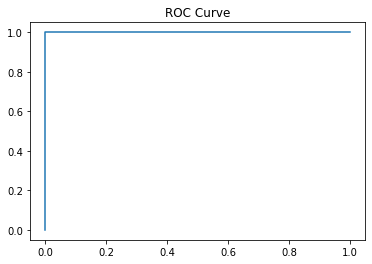

AUC: 1.0


In [35]:
logisticRegr_sm = LogisticRegression()
logisticRegr_sm.fit(X_train_sm, Y_train_sm)

pred_sm=logisticRegr_sm.predict(X_train_sm)

print(confusion_matrix(Y_train_sm,pred_sm))
fpr,tpr,thresholds=metrics.roc_curve(Y_train_sm, pred_sm)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

### Question 2.b(i)

Binary Classification Using L1-penalized logistic regression.

i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues
for variable selection, use L1 regularization. Note that in this problem,
you have to cross-validate for both l, the number of time series into which you
break each of your instances, and , the weight of L1 penalty in your logistic
regression objective function (or C, the budget). Packages usually perform
cross-validation for  automatically.9

In [36]:
scores_lst_l1=[]
lval_l1=[]
cval_lt=[]


for i in range(1,21):
    h=main_df2(i)
    x1=h.iloc[:,:-1]
    x= StandardScaler().fit_transform(x1)
    y=h['labels']
    
    g=main_test2(i)
    g1=g.iloc[:,:-1]
    x2=StandardScaler().fit_transform(g1)
    y2=g['labels']
    
    log_reg_l1=LogisticRegressionCV(Cs=10,random_state=0,penalty='l1', cv=5, solver='liblinear',refit=True)
    log_reg_l1=log_reg_l1.fit(x,y)


    Y_pred_l1=log_reg_l1.predict(x)
    Y_pred_test=log_reg_l1.predict(x2)
    
    scores_lst_l1.append(log_reg_l1.score(x,y))
    cval_lt.append(log_reg_l1.C_)
    lval_l1.append((i,log_reg_l1.C_))
   
    for i in range(len(scores_lst_l1)):
        if scores_lst_l1[i]==1.0:
            scores_lst_l1[i]=0            


In [37]:
#Finding the best score of the pair
max_c1=max(scores_lst_l1)
split_index=scores_lst_l1.index(max_c1)+1
split_index
best_C=cval_lt[split_index-1]
print(f"The best value for l is {split_index} and the value of {best_C} ")

The best value for l is 15 and the value of [0.35938137] 


### Question 2.b.(ii)

Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

On the basis of above results, L1-penalized performs better than Variable selection using p-values.

L1-penalized is easier to implement.

### Question 2.c.(i)

Multi-class Classification (The Realistic Case)

Find the best l in the same way as you found it in 2(b)i to build an L1-
penalized multinomial regression model to classify all activities in your training
set.10 Report your test error. Research how confusion matrices and ROC
curves are defined for multiclass classification and show them for this problem
if possible.11


###### Training set

In [38]:
act_labels = ['bending1']*5+['bending2']*4+['cycling']*12+['lying']*12+['sitting']*12+['standing']*12+['walking']*12

In [39]:
def main_multinomial(p):
    fnl_col_mul = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_mul.append(j+str(i)+str(k))
    
    df_fnl_mul= pd.DataFrame(columns=fnl_col_mul)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_mul=[]
    for v in dfs_train:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_mul.append(l1)
            l1=[]
            lst_fnl_mul.append(l2)
            l2=[]
            lst_fnl_mul.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_mul:
        flat+=i
    j=0
    for i in fnl_col_mul:
        df_fnl_mul[i] = flat[j:len(flat)+1:18*p]
        j+=1
    
    df_fnl_mul['label_activity']=act_labels
    return df_fnl_mul

###### Test data 

In [40]:
act_tst_labels=['bending1']*2+['bending2']*2+['cycling']*3+['lying']*3+['sitting']*3+['standing']*3+['walking']*3

In [41]:
def main_multi_tst(p):
    fnl_col_test = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_test.append(j+str(i)+str(k))
    
    df_fnl_test= pd.DataFrame(columns=fnl_col_test)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_test=[]
    for v in dfs_test:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_test.append(l1)
            l1=[]
            lst_fnl_test.append(l2)
            l2=[]
            lst_fnl_test.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_test:
        flat+=i
    j=0
    for i in fnl_col_test:
        df_fnl_test[i] = flat[j:len(flat)+1:18*p]
        j+=1
    
    df_fnl_test['label_activity_tst']=act_tst_labels
    return df_fnl_test


###### multiclass

In [42]:
model_lst=[]
for i in range(1,21):
    model = LogisticRegressionCV(Cs=10,random_state=0,penalty='l1', cv=5, solver='liblinear',refit=True)
    mul= main_multinomial(i)
    x=mul.iloc[:,:-1]
    y=mul['label_activity']
    mul_log_reg=model.fit(x,y)
    model_lst.append(mul_log_reg.score(x,y))

In [43]:
for i in range(len(model_lst)):
        if model_lst[i]==1.0:
            model_lst[i]=0 


In [44]:
best_l=np.argmax(model_lst)+1
print(f"The best l value is {best_l}")

The best l value is 1


In [45]:
from sklearn.metrics import accuracy_score
# model_mul = LogisticRegressionCV(Cs=10,random_state=0,penalty='l1', cv=5, solver='liblinear',refit=True)
mul= main_multinomial(best_l)
x=mul.iloc[:,:-1]
y=mul['label_activity']
mul_log_reg=model.fit(x,y)


mul_tst= main_multi_tst(best_l)
xtst=mul_tst.iloc[:,:-1]
ytst=mul_tst['label_activity_tst']


ypred= mul_log_reg.predict(xtst)
print(metrics.accuracy_score(ytst,ypred))
print(metrics.confusion_matrix(ytst,ypred))

0.7894736842105263
[[2 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


### Question 2.c.(ii)

Repeat 2(c)i using a Naiive Bayes' classifier. Use both Gaussian and Multinomial
priors and compare the results.

##### Multinomial Naive bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [47]:
model_lst_nb=[]
for i in range(1,21):
    model_nb = MultinomialNB()
    mul_nb= main_multinomial(i)
    x=mul_nb.iloc[:,:-1]
    y=mul_nb['label_activity']
    mul_log_reg_nb=model_nb.fit(x,y)
       
    model_lst_nb.append(mul_log_reg_nb.score(x,y))

In [48]:
best_l_NB= np.argmax(model_lst_nb)+1
print("The Best l value is:",best_l_NB)

The Best l value is: 5


In [49]:
print("The accuracy is:",model_lst_nb[best_l_NB])

The accuracy is: 0.9420289855072463


In [50]:
model_nb = MultinomialNB()
mul_nb= main_multinomial(best_l_NB)
x=mul_nb.iloc[:,:-1]
y=mul_nb['label_activity']
mul_log_reg_nb=model_nb.fit(x,y)

mul_tst_nb= main_multi_tst(best_l_NB)
xtst_nb=mul_tst_nb.iloc[:,:-1]

ytst_nb=mul_tst['label_activity_tst']

ypred_nb= mul_log_reg_nb.predict(xtst_nb)
print(metrics.accuracy_score(ytst_nb,ypred_nb))
print(metrics.confusion_matrix(ytst_nb,ypred_nb))


0.7894736842105263
[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


###### Gaussian naive bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model_gaus_lst=[]
for i in range(1,21):
    model_gaus = GaussianNB()
    mul_gaus= main_multinomial(i)
    x=mul_gaus.iloc[:,:-1]
    y=mul_gaus['label_activity']
    mul_log_gaus=model_gaus.fit(x,y)
    model_gaus_lst.append(mul_log_gaus.score(x,y))
    
for i in range(len(model_gaus_lst)):
    if model_gaus_lst[i] == 1.0:
        model_gaus_lst[i]=0
# ind_gau = scores_gau.index(max(scores_gau))


In [53]:
best_l_gauss= np.argmax(model_gaus_lst)+1
print("The Best l value is:",best_l_gauss)

The Best l value is: 3


In [54]:
print("The accuracy is:",model_gaus_lst[best_l_gauss])

The accuracy is: 0.9855072463768116


In [55]:
gaus_gb = GaussianNB()
gaus_nbb= main_multinomial(best_l_gauss)
xgb=gaus_nbb.iloc[:,:-1]
ygb=gaus_nbb['label_activity']
mul_log_reg_gaus=gaus_gb.fit(xgb,ygb)

mul_tst_gb= main_multi_tst(best_l_gauss)
xtst_gb=mul_tst_gb.iloc[:,:-1]

ytst_gb=mul_tst_gb['label_activity_tst']

ypred_gb= mul_log_reg_gaus.predict(xtst_gb)
print(metrics.accuracy_score(ytst_gb,ypred_gb))
print(metrics.confusion_matrix(ytst_gb,ypred))


0.8421052631578947
[[2 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


## The Gaussian Naive Bayes multinomial Classifier Performs the best out of all classifiers.

#### ISLR 4.8.3
This problem relates to the QDA model, in which the observations
within each class are drawn from a normal distribution with a classspecific mean vector and a class specific covariance matrix.
We consider the simple case where p = 1; i.e. there is only one feature.

Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(µk, σ2k). 
Recall that the density function for the one-dimensional normal distribution is given in (4.16).
Prove that in this case, the Bayes classifier is not linear. 
Argue that it is in fact quadratic.

Hint: For this problem, you should follow the arguments laid out in
Section 4.4.1, but without making the assumption that σ2
1 = ... = σ2K

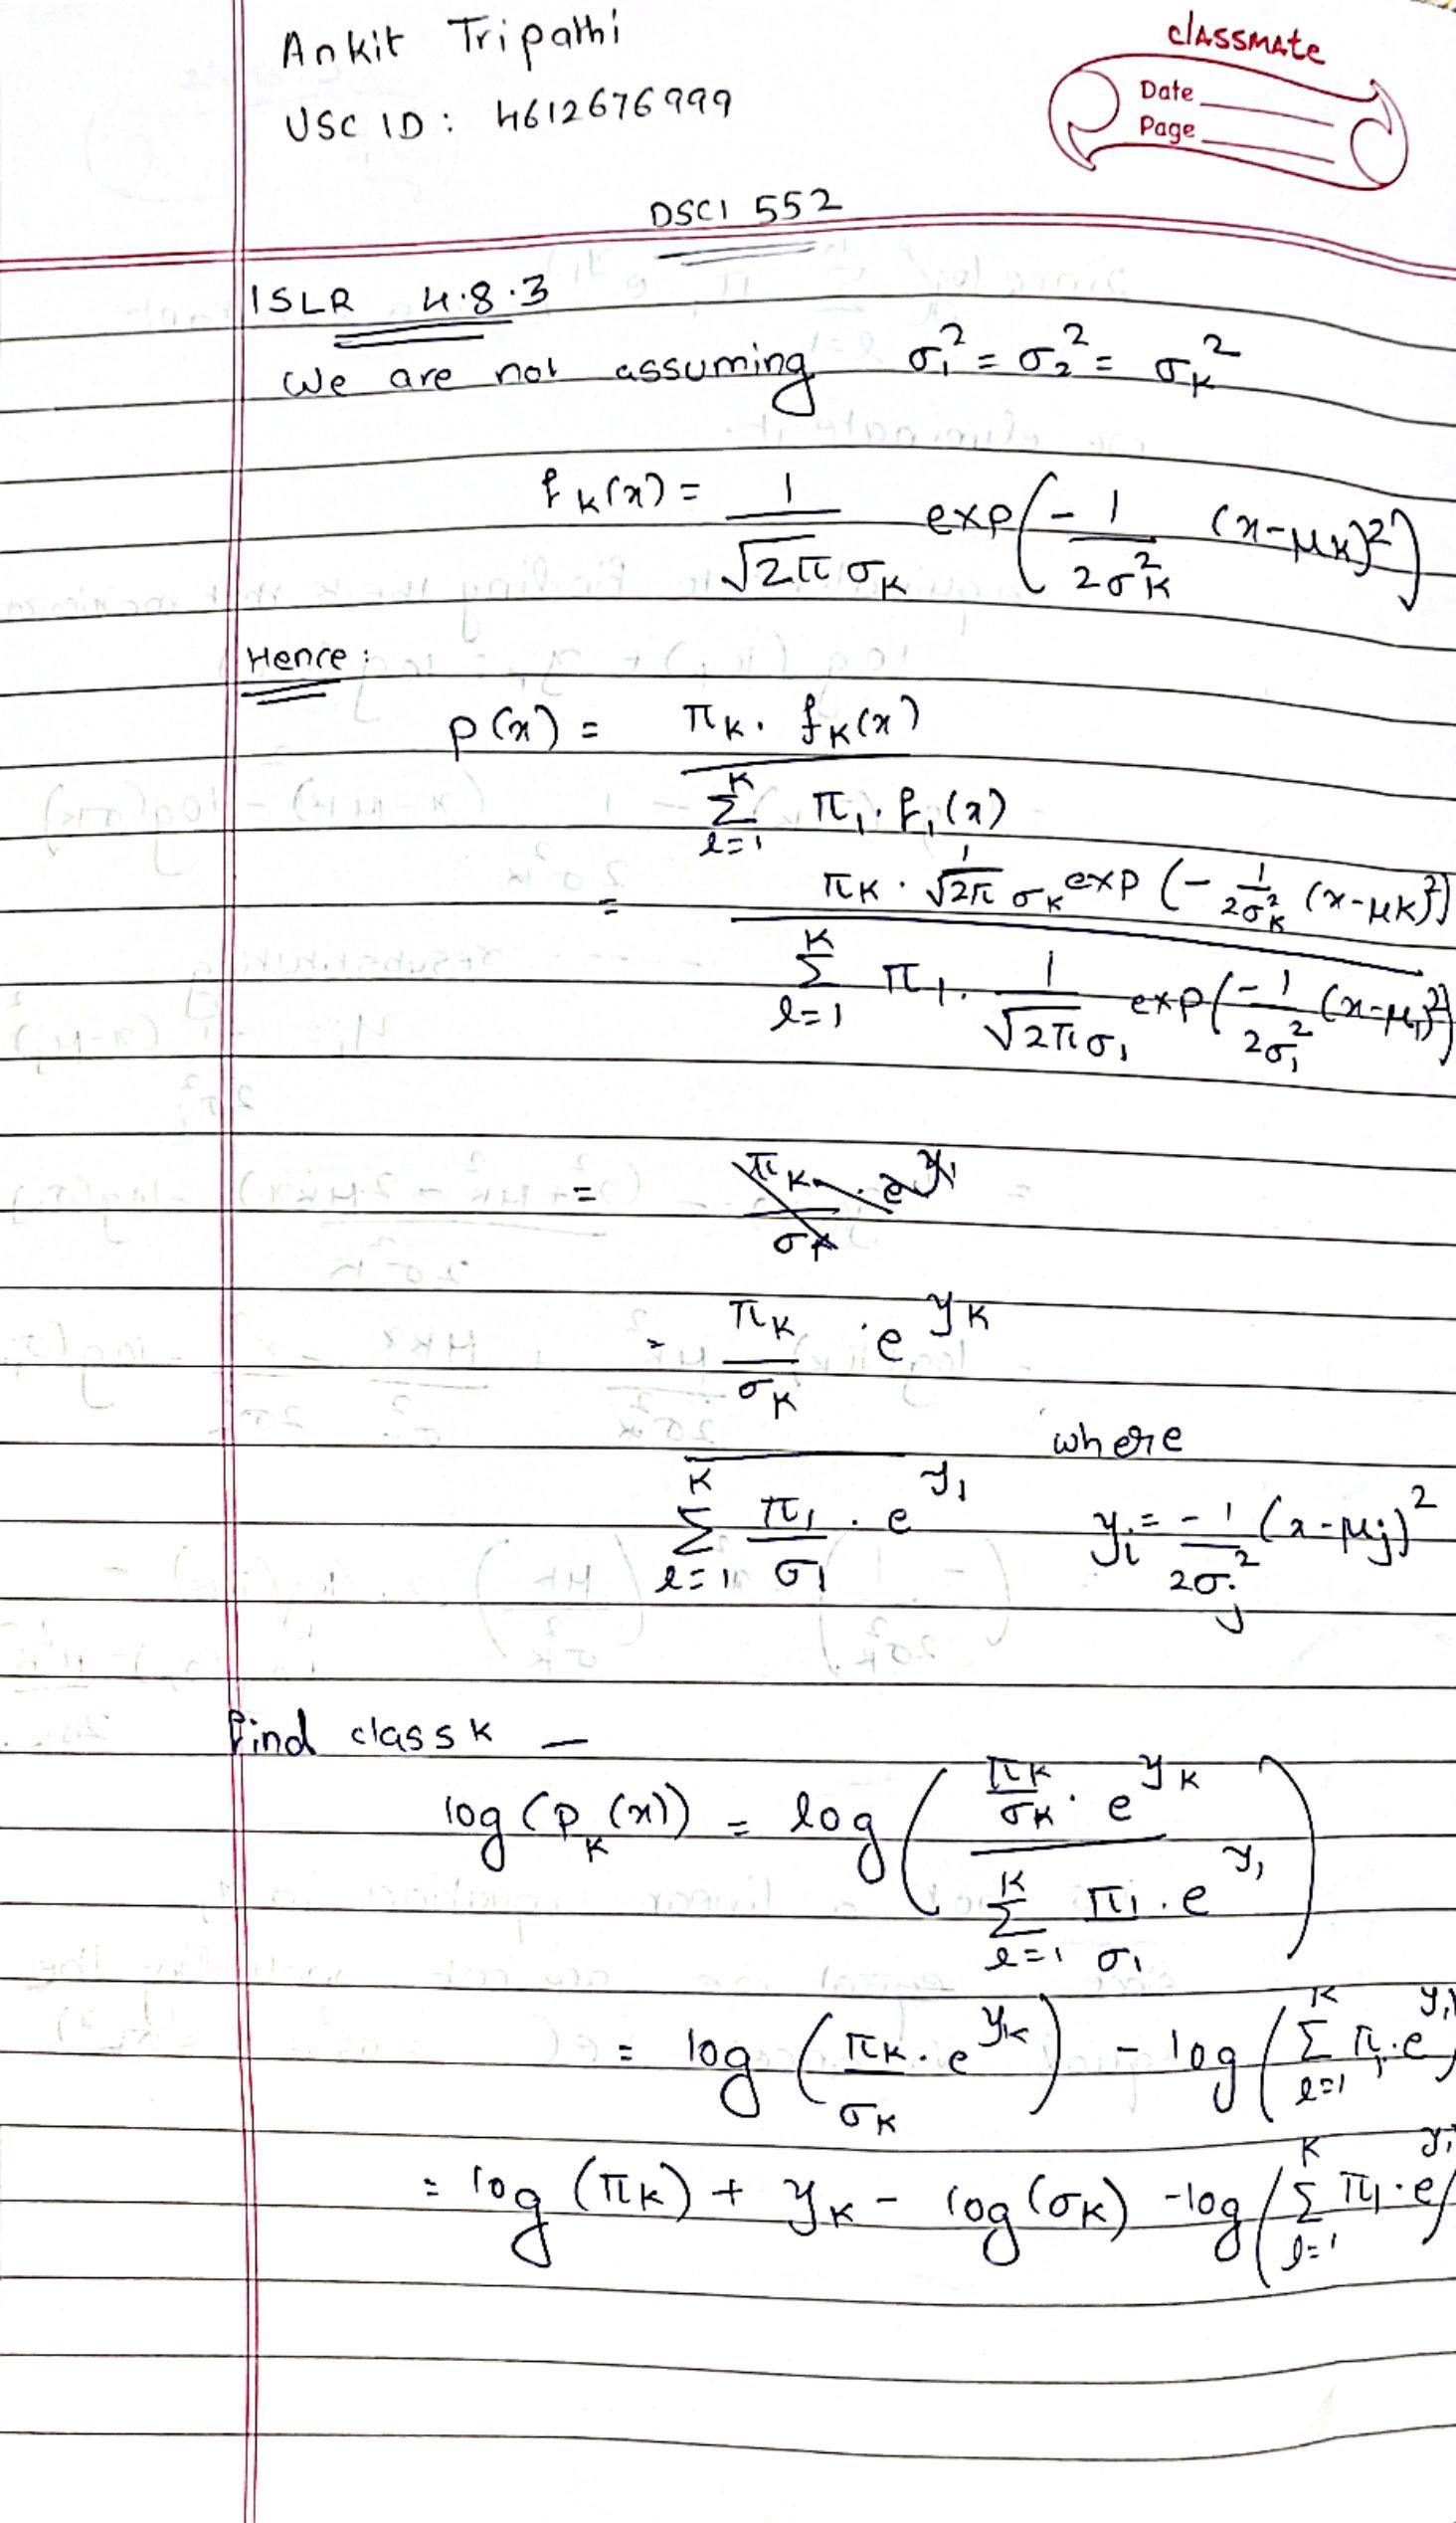


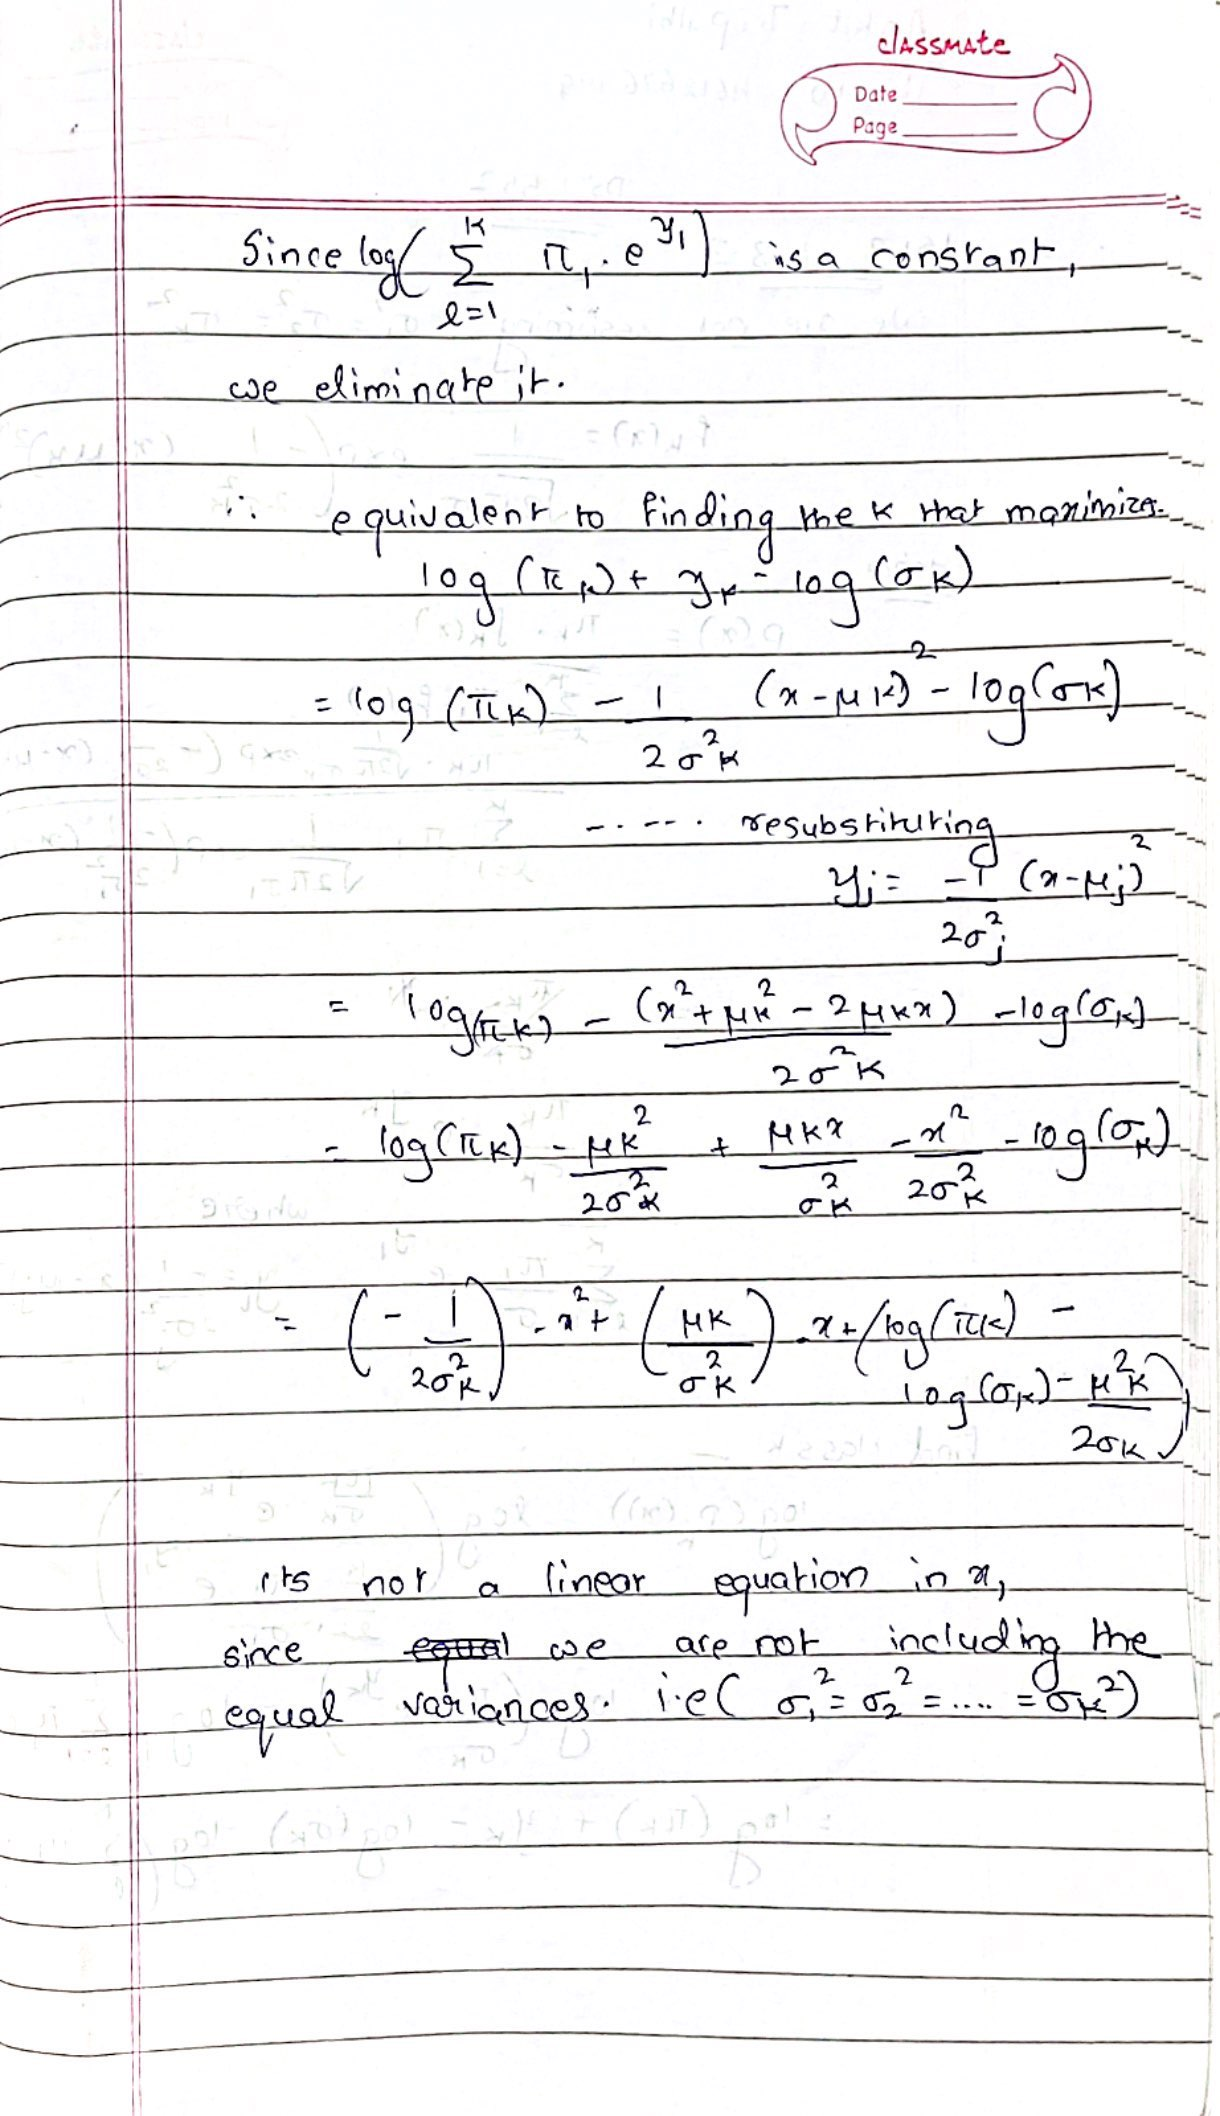

### ISLR 4.8.7

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. 

We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X¯ = 10,
while the mean for those that didn’t was X¯ = 0.

In addition, the variance of X for these two sets of companies was ˆσ2 = 36.

Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

Hint: Recall that the density function for a normal random variable
is f(x) = √12πσ2 e−(x−µ)2/2σ2.
You will need to use Bayes’ theorem.

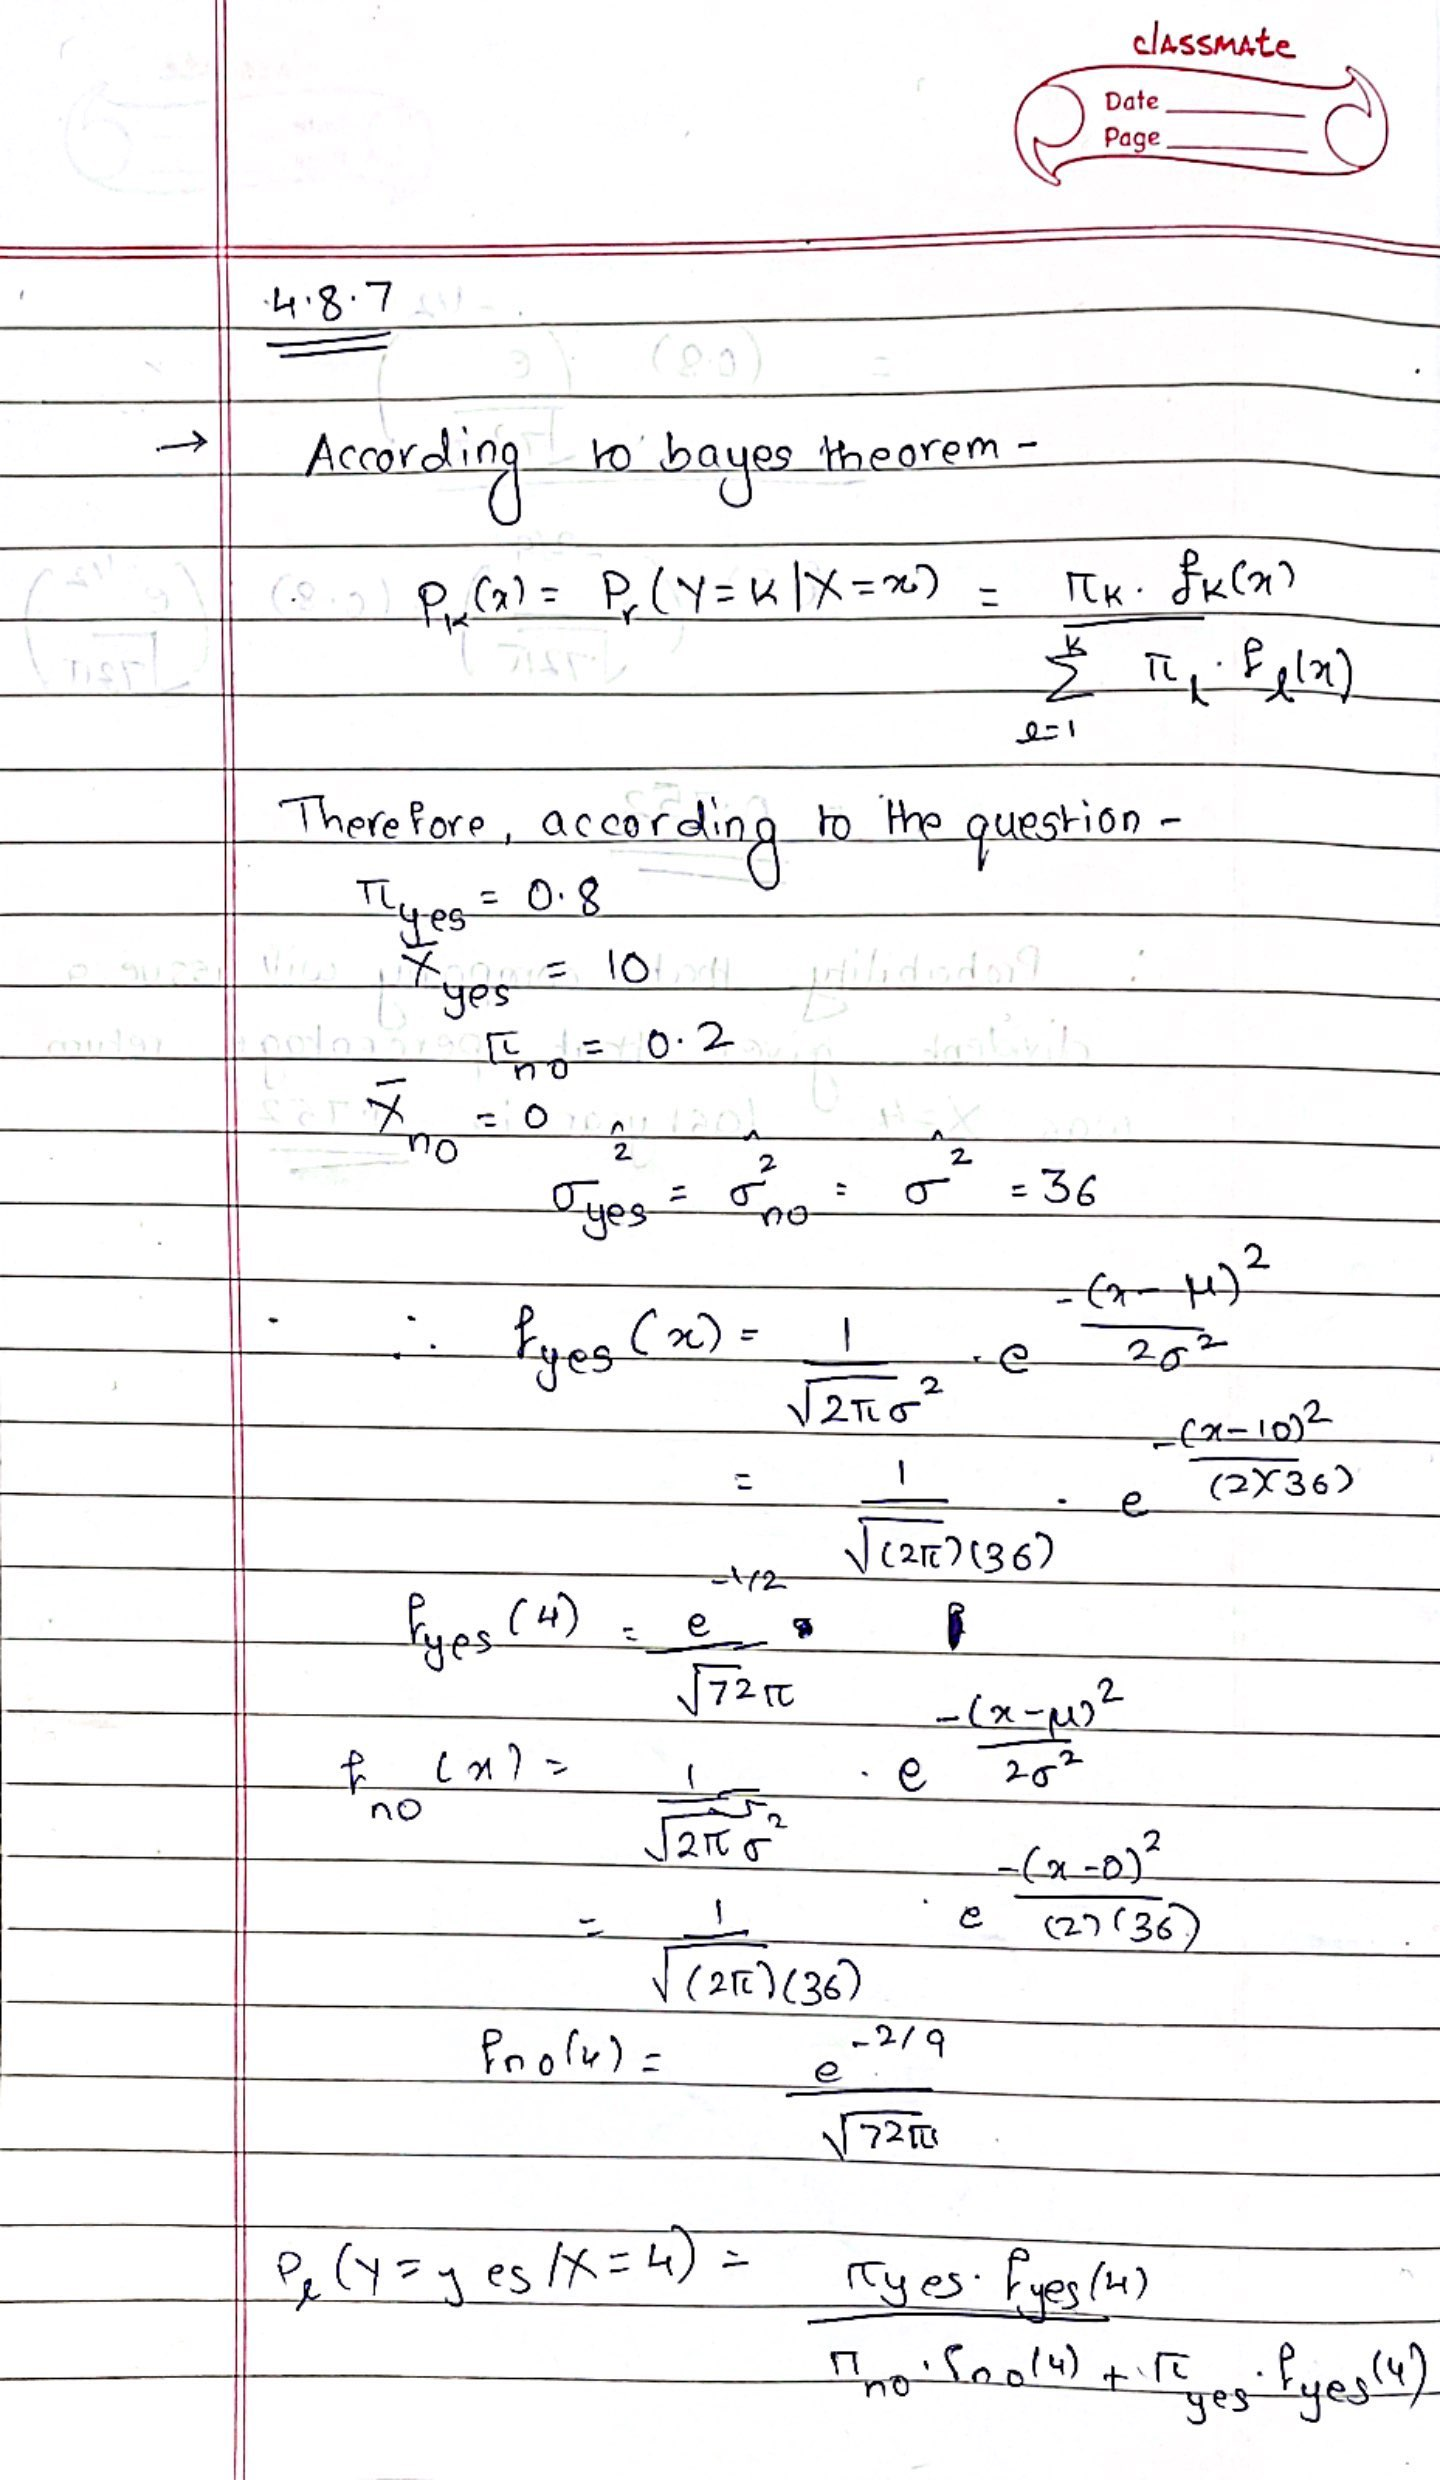

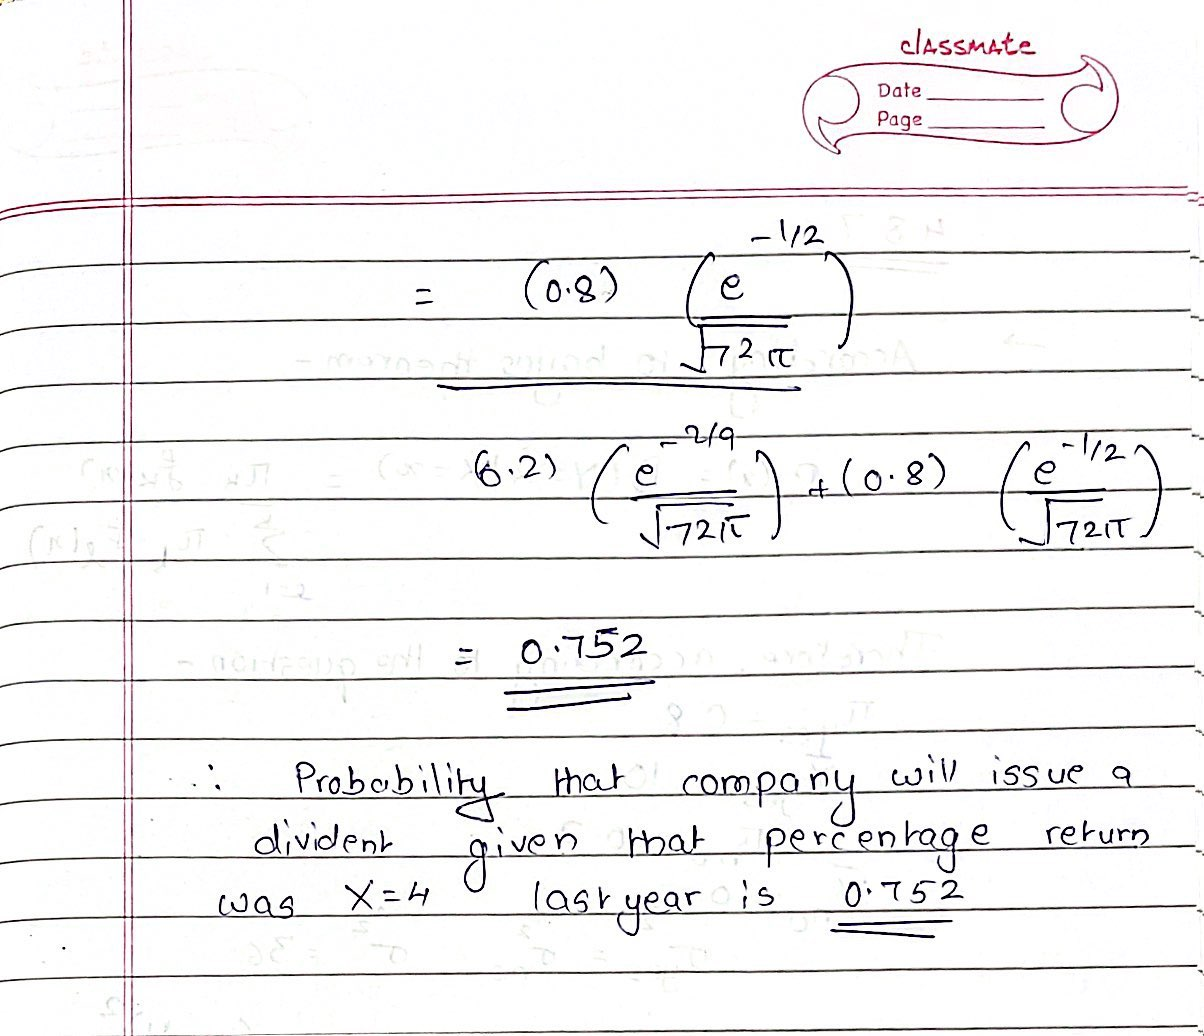